In [2]:
#import HR_process
from datetime import datetime, timedelta
import glob
import pandas as pd
import numpy as np
%matplotlib inline

In [76]:
class decisionnode:
    def __init__(self,col=-1,value=None,num=-1,results=None,tb=None,fb=None, samples = []):
        self.col=col # column index of criteria being tested
        self.value=value # vlaue necessary to get a true result
        self.results=results # dict of results for a branch, None for everything except endpoints
        self.num=num # number of samples in node
        self.tb=tb # true decision nodes 
        self.fb=fb # false decision nodes
        self.samples=samples # all sample ids of node
    def __str__(self):
        return "COL: %s | VALUE: %s | RESULTS: %s | \n NUM: %s | TB: %s | FB: %s \n\n" %(str(self.col), 
                                                    str(self.value),
                                                    str(self.results),
                                                    str(self.num),
                                                    str(self.tb),
                                                    str(self.fb))
def printtree(tree, final_with_meds, indent='', just_tree = False, depth = 0):
    import matplotlib.pyplot as plt
    import seaborn as sns
    columns = final_with_meds.columns
    # Is this a leaf node?
    if just_tree == False:
        if tree.results!=None:# or depth == 4:
            if tree.results!=None:
                print "KL: {0:0.2f} | Samples: {1}".format(tree.results, tree.num)
        else:
            # Print the criteria
            print 'Column ' + str(columns[tree.col])+' : '+str(tree.value)+'?   | ' + 'Gain: ' + str(tree.gain) + '  | Depth: ' + str(depth)
    #         if depth < 4:
            # Print the branches
            print indent+'True or GREATER ->',
            printtree(tree.tb,final_with_meds, indent+'  ', just_tree = False, depth = depth + 1)
            print indent+'False or LESS/EQUAL ->',
            printtree(tree.fb,final_with_meds, indent+'  ', just_tree = False, depth = depth + 1)
    else:
        thislevel = [tree]
        count = 0
        while thislevel and count < 7:
            nextlevel = []
            print "DEPTH: ", count, 
            for n in thislevel:
                print str(columns[n.col]) + ": " + str(n.value) + " | ",
                cur = n.samples
                cur_pdfs = final_with_meds[final_with_meds.sample_ID.isin(cur)].pdf
                np.random.seed(0)
                pdf_avg = np.divide(map(sum, zip(*cur_pdfs)), len(cur_pdfs))
                ax1 = plt.axes(frameon=False)
                pdf_avg = [[x/5]*5 for x in pdf_avg]
                pdf_avg = [item for sublist in pdf_avg for item in sublist] 
                sample_data = np.random.choice(np.arange(20, 220), size = 21600, p = pdf_avg)
                sns.distplot(sample_data, hist = False, kde_kws={"shade": True, "color":"#FF007E"})
                ax1.axes.get_yaxis().set_visible(False)
                plt.xlim((20, 180))
                plt.show()

                if n.tb: nextlevel.append(n.tb)
                if n.fb: nextlevel.append(n.fb)
            count += 1
            print
            thislevel = nextlevel

In [77]:
print "Now printing tree..."
printtree(FINAL_TREE, final_with_meds_and_dx, just_tree = False, depth = 0)

Now printing tree...
Column Age : 38?   | Gain: 337.803233327  | Depth: 0
True or GREATER -> Column OTHER DISEASES OF RESPIRATORY SYSTEM  : 0?   | Gain: 198.376667697  | Depth: 1
  True or GREATER -> Column Age : 77?   | Gain: 155.538475525  | Depth: 2
    True or GREATER -> Column RHEUMATISM, EXCLUDING THE BACK  : 0?   | Gain: 86.9508613291  | Depth: 3
      True or GREATER -> Column MYCOSES  : 0?   | Gain: 63.2288946564  | Depth: 4
        True or GREATER -> KL: 211.34 | Samples: 182
        False or LESS/EQUAL -> KL: 75.24 | Samples: 104
      False or LESS/EQUAL -> Column PNEUMOCONIOSES AND OTHER LUNG DISEASES DUE TO EXTERNAL AGENTS  : 0?   | Gain: 53.2300617799  | Depth: 4
        True or GREATER -> KL: 170.79 | Samples: 200
        False or LESS/EQUAL -> Column NEPHRITIS, NEPHROTIC SYNDROME, AND NEPHROSIS  : 0?   | Gain: 39.4422052492  | Depth: 5
          True or GREATER -> Column ORGANIC SLEEP DISORDERS  : 0?   | Gain: 40.7871085427  | Depth: 6
            True or GREATER -> Co

Now printing tree...
DEPTH:  0 Age: 38 | 

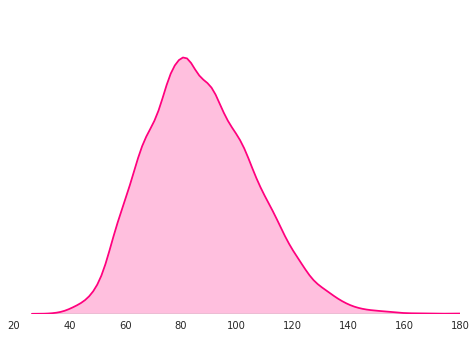


DEPTH:  1 OTHER DISEASES OF RESPIRATORY SYSTEM : 0 | 

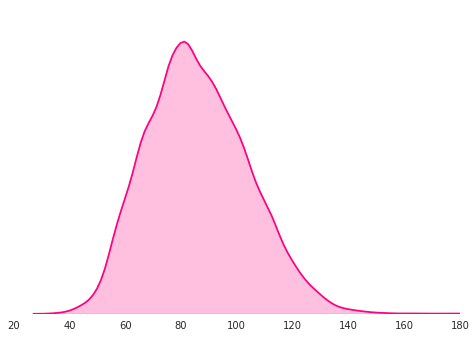

 ICU_unit: 13ICU | 

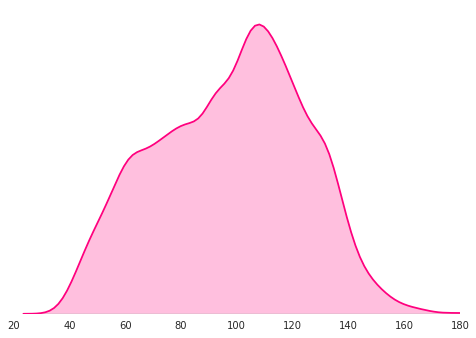


DEPTH:  2 Age: 77 | 

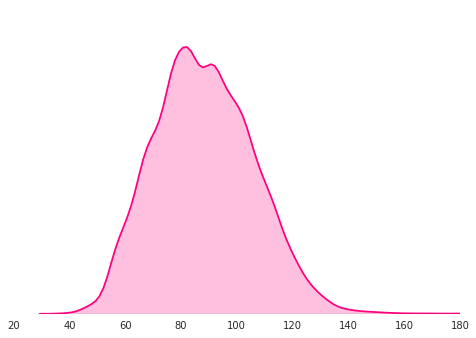

 DISEASES OF PULMONARY CIRCULATION : 0 | 

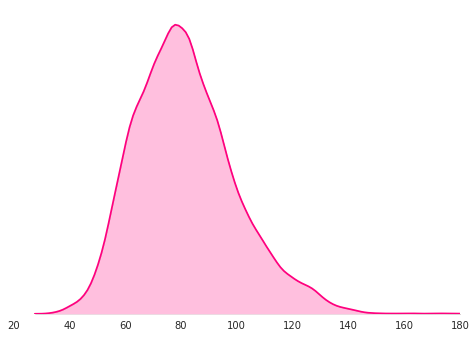

 DORSOPATHIES : 0 | 

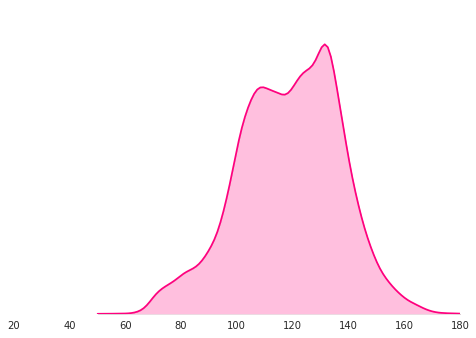

 ICU_unit: 10ICC | 

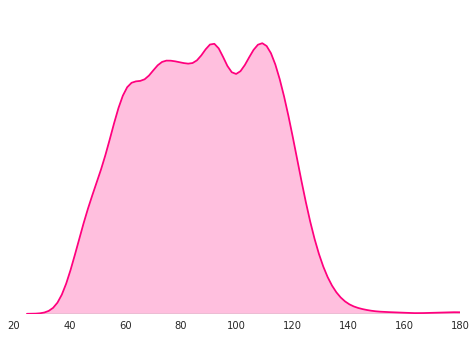


DEPTH:  3 RHEUMATISM, EXCLUDING THE BACK : 0 | 

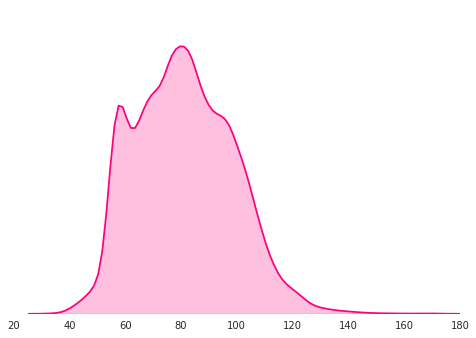

 DISEASES OF ARTERIES, ARTERIOLES, AND CAPILLARIES : 0 | 

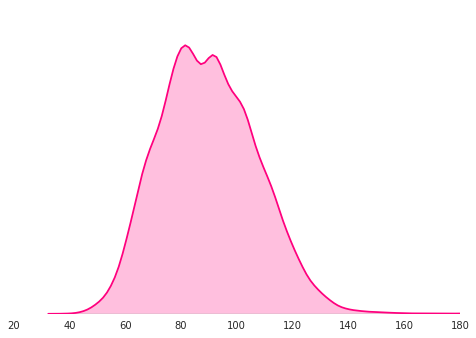

 ICU_unit: 10ICC | 

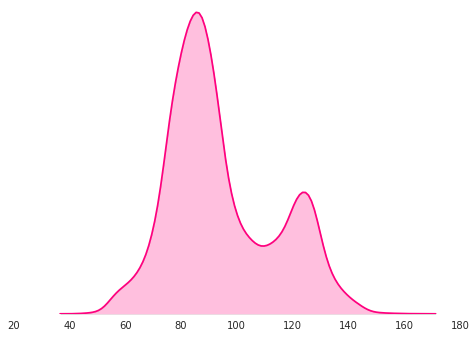

 PNEUMONIA AND INFLUENZA : 0 | 

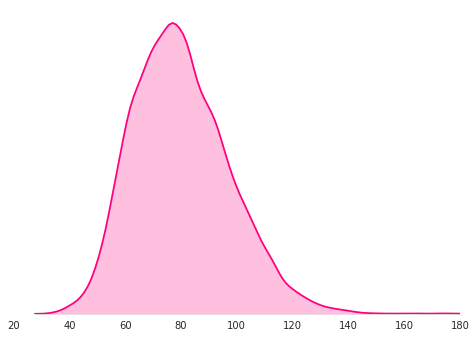

 ARTHROPATHIES AND RELATED DISORDERS : 0 | 

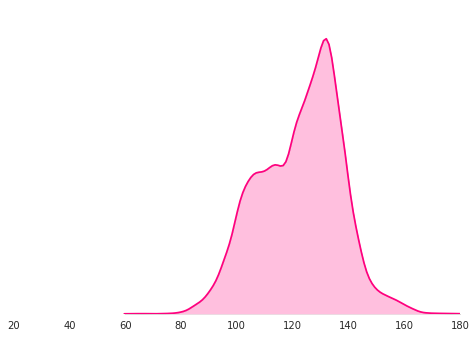

 pdf: None | 

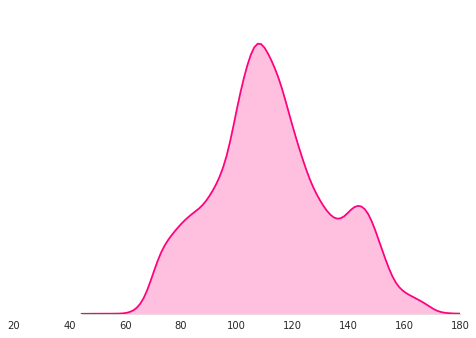

 pdf: None | 

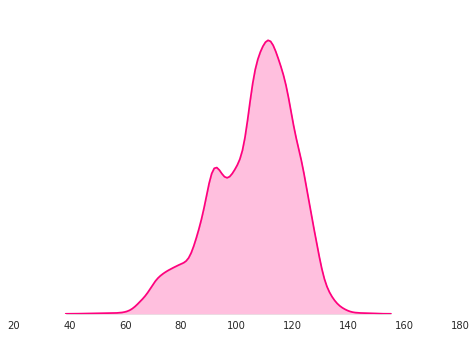

 CEREBROVASCULAR DISEASE : 0 | 

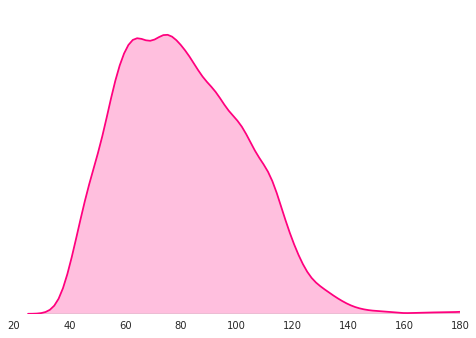


DEPTH:  4 MYCOSES : 0 | 

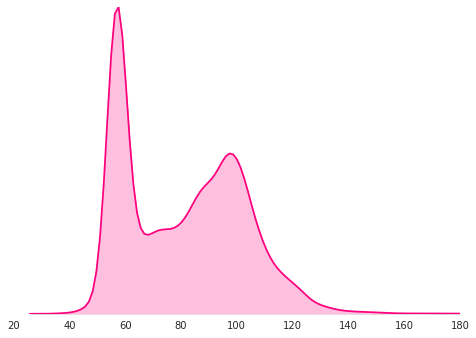

 PNEUMOCONIOSES AND OTHER LUNG DISEASES DUE TO EXTERNAL AGENTS : 0 | 

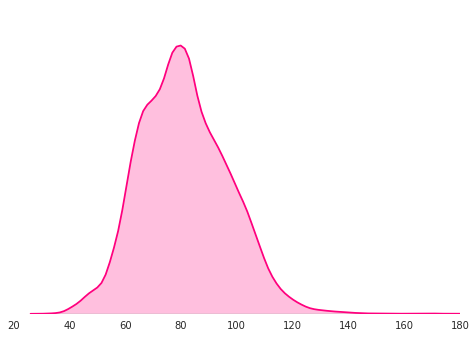

 DISORDERS OF THE PERIPHERAL NERVOUS SYSTEM : 0 | 

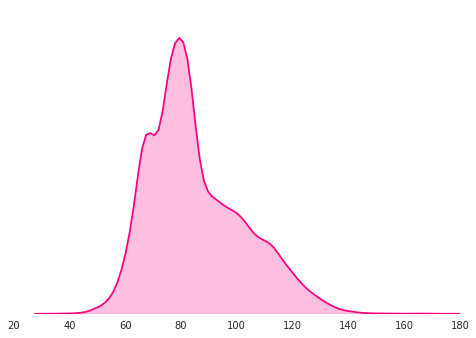

 HYPERTENSIVE DISEASE : 0 | 

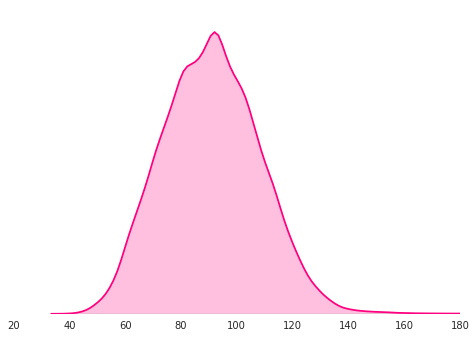

 pdf: None | 

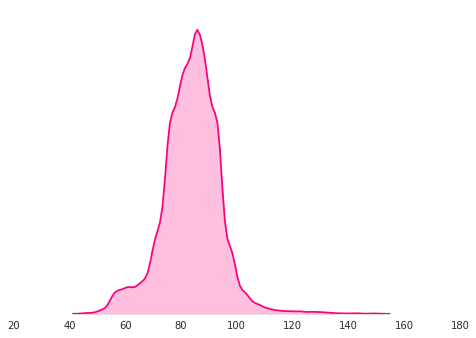

 pdf: None | 

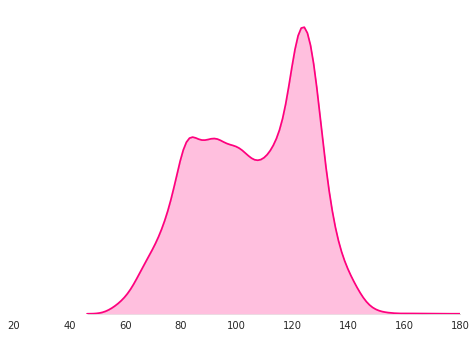

 pdf: None | 

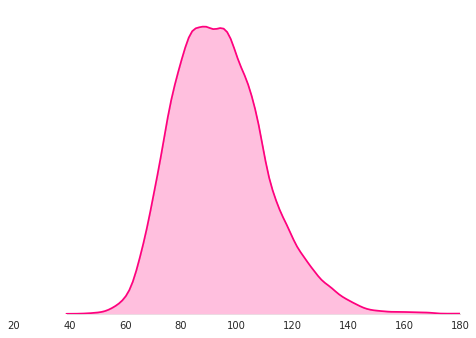

 CEREBROVASCULAR DISEASE : 0 | 

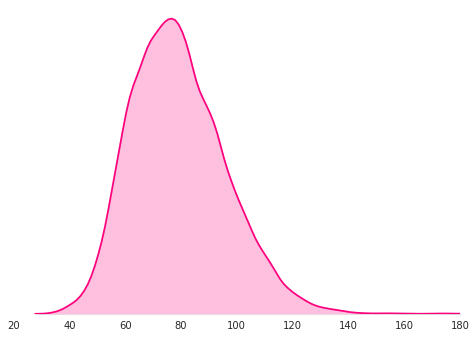

 pdf: None | 

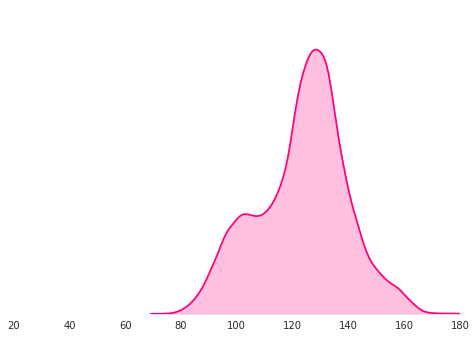

 pdf: None | 

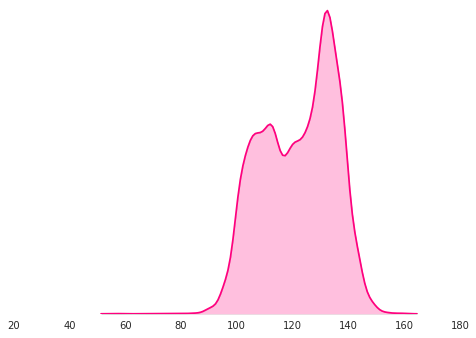

 pdf: None | 

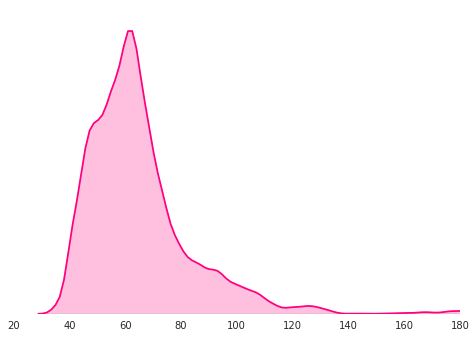

 ICU_unit: 11NICU | 

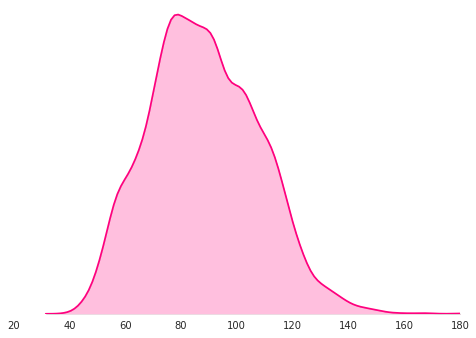


DEPTH:  5 pdf: None | 

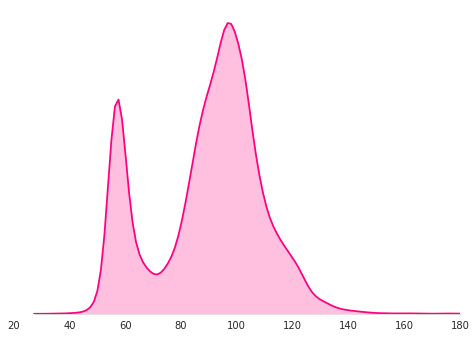

 pdf: None | 

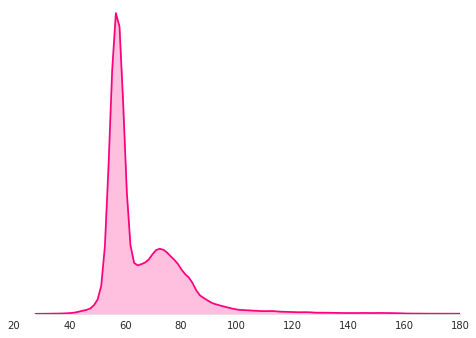

 pdf: None | 

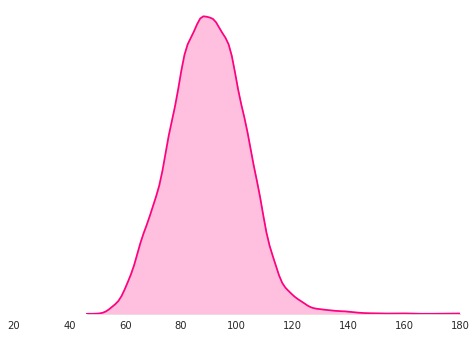

 NEPHRITIS, NEPHROTIC SYNDROME, AND NEPHROSIS : 0 | 

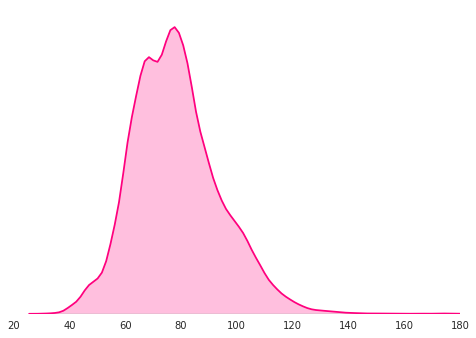

 pdf: None | 

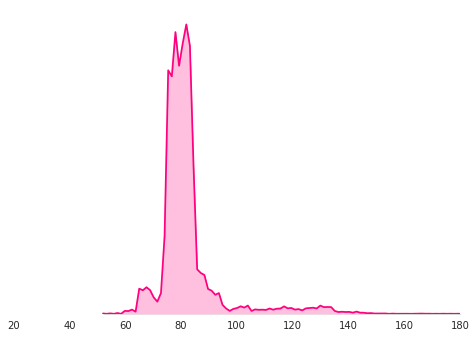

 EthnicGroup: Hispanic or Latino | 

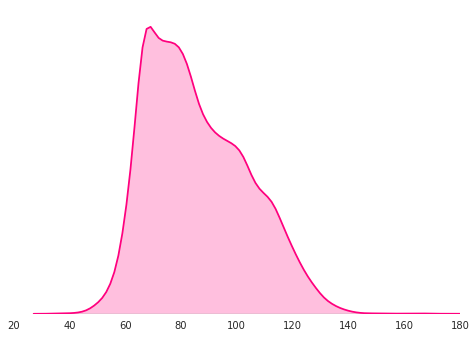

 OTHER FORMS OF HEART DISEASE : 0 | 

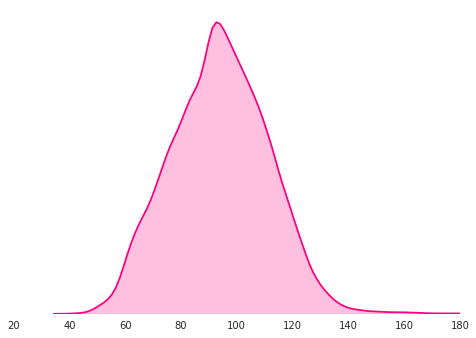

 CHRONIC OBSTRUCTIVE PULMONARY DISEASE AND ALLIED CONDITIONS : 0 | 

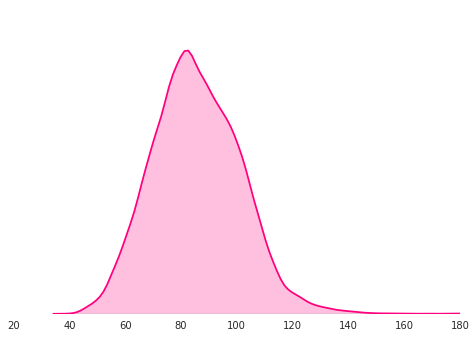

 Race: Asian | 

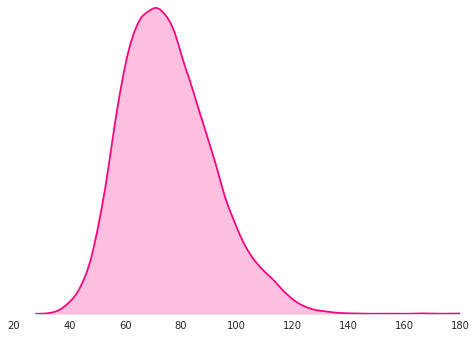

 ORGANIC PSYCHOTIC CONDITIONS : 0 | 

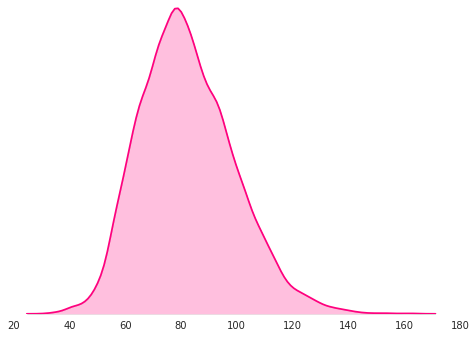

 pdf: None | 

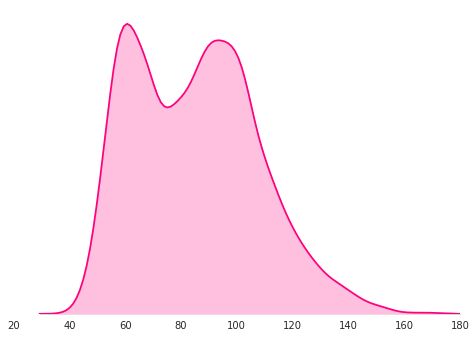

 OTHER DISEASES OF RESPIRATORY SYSTEM : 0 | 

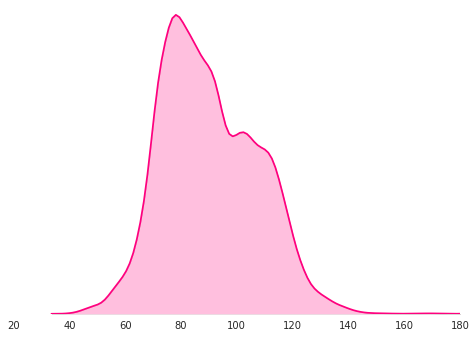


DEPTH:  6 ORGANIC SLEEP DISORDERS : 0 | 

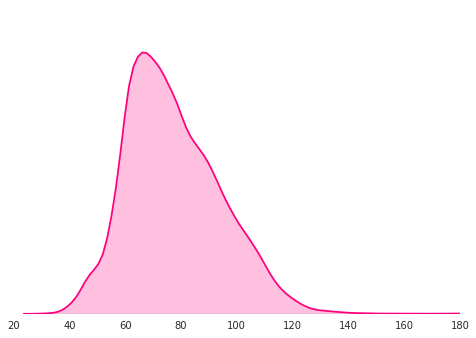

 pdf: None | 

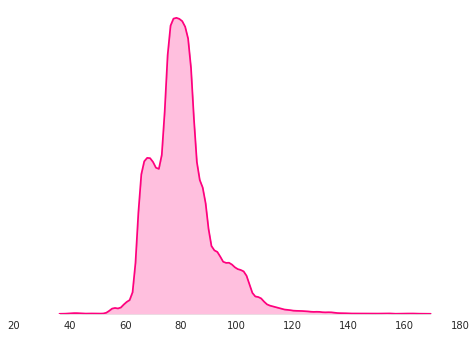

 pdf: None | 

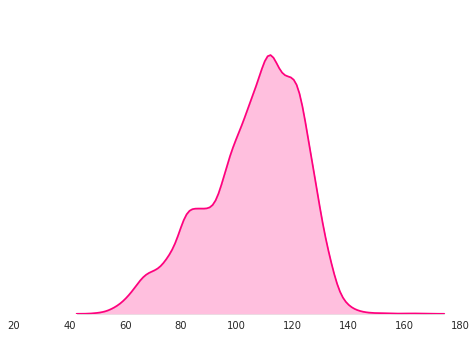

 RHEUMATISM, EXCLUDING THE BACK : 0 | 

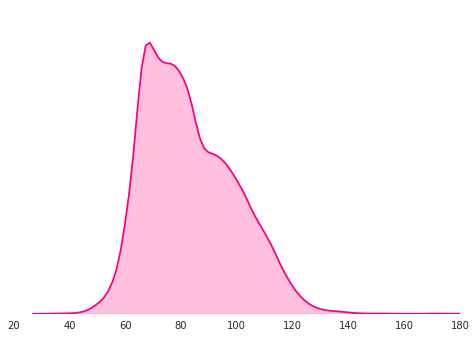

 CERTAIN TRAUMATIC COMPLICATIONS AND UNSPECIFIED INJURIES : 0 | 

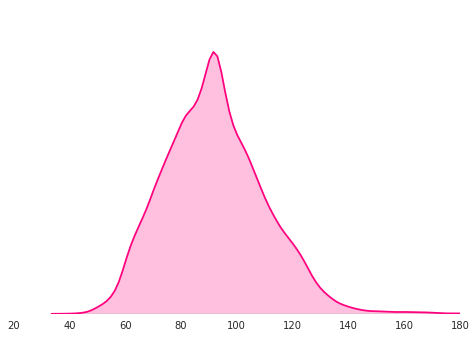

 NEPHRITIS, NEPHROTIC SYNDROME, AND NEPHROSIS : 0 | 

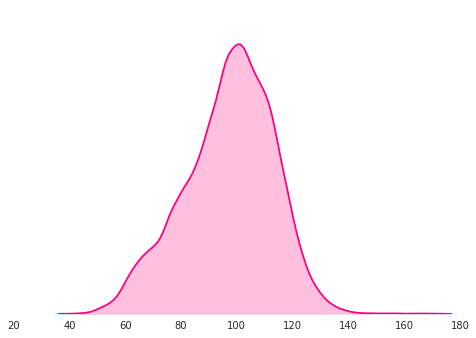

 OTHER DISEASES OF DIGESTIVE SYSTEM : 0 | 

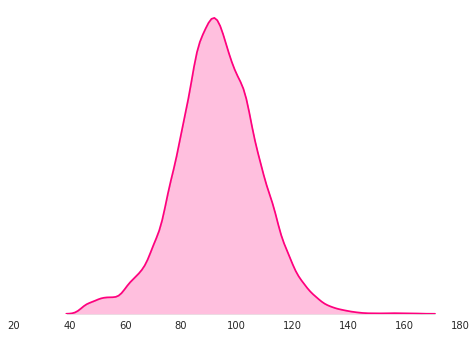

 NEPHRITIS, NEPHROTIC SYNDROME, AND NEPHROSIS : 0 | 

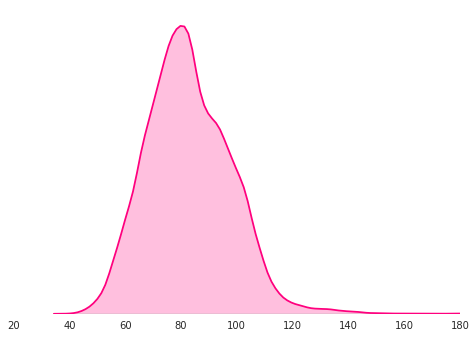

 Age: 74.93 | 

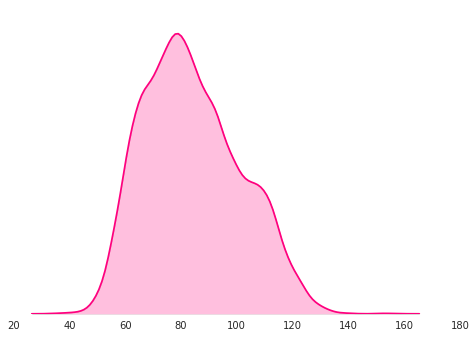

 Age: 53 | 

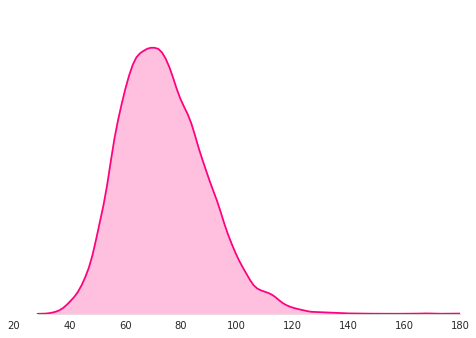

 pdf: None | 

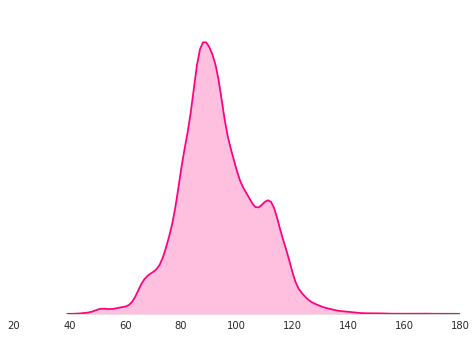

 NUTRITIONAL DEFICIENCIES : 0 | 

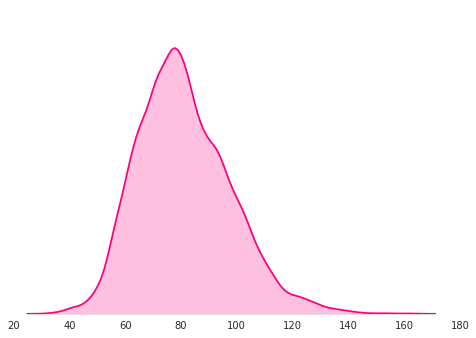

 pdf: None | 

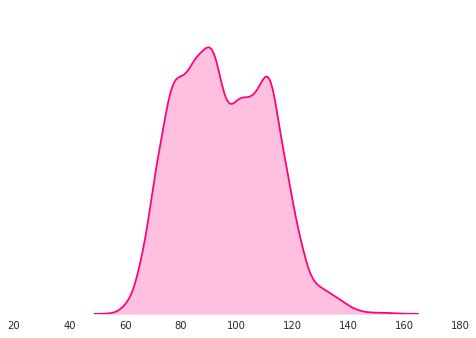

 pdf: None | 

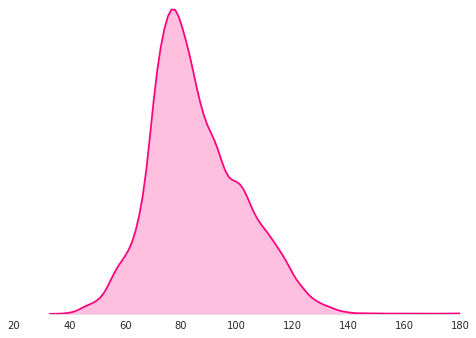

In [67]:
import pickle
final_with_meds_and_dx = pd.read_json('JSONs/final_HR_segments_with_meds_and_dxs_FULL_6_hrs.json')

final_with_meds_and_dx = final_with_meds_and_dx.drop([u'hist', 'DOB', 'DeathDate', 'SA_ID', 'PAT_ID','date','end_time','start_time'], axis = 1)

#Move sample ID to beginning and pdf to end
cols = list(final_with_meds_and_dx)
cols.insert(0, cols.pop(cols.index('sample_ID')))
cols.append(cols.pop(cols.index('pdf')))
final_with_meds_and_dx = final_with_meds_and_dx.ix[:, cols]

FINAL_TREE = pickle.load(open('Pickles/6_MEDS_DX_FULL_min_leaf_100.tree', 'rb'))

print "Now printing tree..."
printtree(FINAL_TREE, final_with_meds_and_dx, just_tree = True, depth = 0)